In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
db1 = 'blobs_same_zmask10yrs.db'
name1 = 'blob_same'
conn = db.Database(db1, defaultTable='observations')
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []

metric = metrics.InterNightGapsMetric(mjdCol='mjd')
slicer = slicers.HealpixSlicer(latCol='dec', lonCol='RA', latLonDeg=True)
sql = 'night < 365 and (filter="g" or filter="i" or filter="r")'
plotDict= {'percentileClip': 95.}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql,
                                             runName=name1, plotDict=plotDict))
metric = metrics.CountMetric(col='mjd')
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql,
                                             runName=name1, plotDict=plotDict))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database observations with constraint night < 365 and (filter="g" or filter="i" or filter="r") for columns ['dec', 'mjd', 'RA', 'night']
Found 103617 visits
Running:  ['blob_same_Median_Inter-Night_Gap_night_lt_365_and_g_or_i_or_r_HEAL', 'blob_same_Count_mjd_night_lt_365_and_g_or_i_or_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night < 365 and (filter="g" or filter="i" or filter="r")" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 1508 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 11.8638  dipole: lon: 155.307, lat: 7.9065, amp: 4.15575


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 2192 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 33.0946  dipole: lon: 29.7829, lat: -44.7745, amp: 13.9975
Plotting complete.


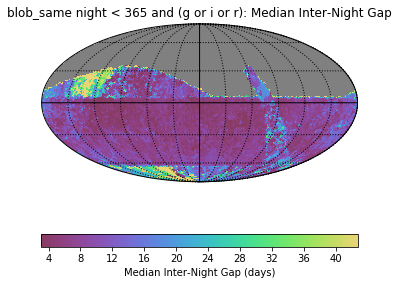

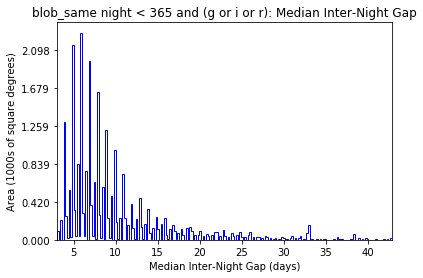

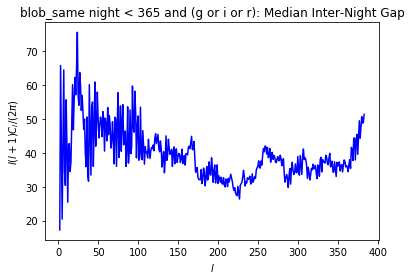

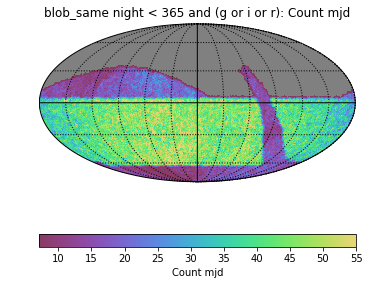

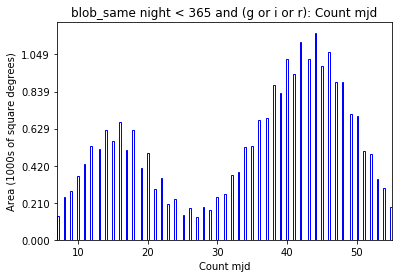

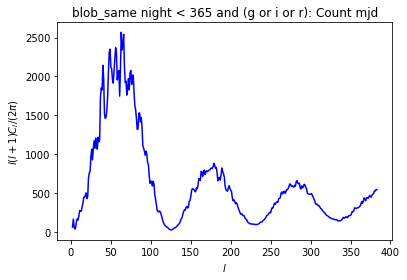

In [4]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

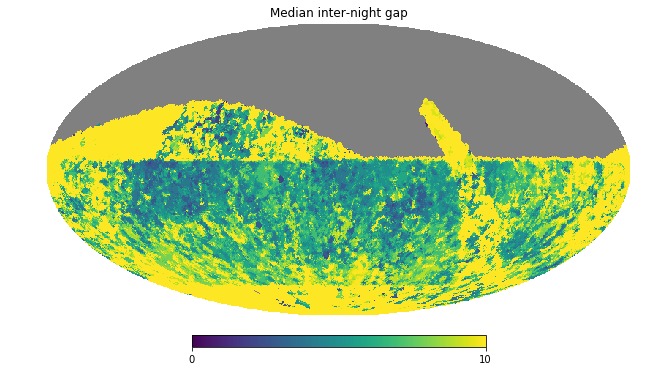

In [5]:
title='Median inter-night gap'
hp.mollview(bundleList[0].metricValues, min=0, max=10, title=title)

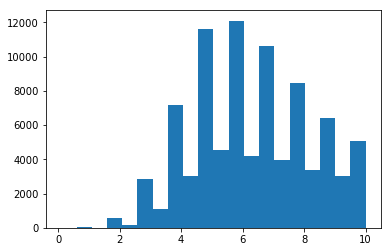

In [6]:
ack = plt.hist(bundleList[0].metricValues, bins=20, range=[0.1,10])

In [7]:
db1 = 'cad_test_1yrs.db'
name1 = 'cad_test'
conn = db.Database(db1, defaultTable='observations')
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

Querying database observations with constraint night < 365 and (filter="g" or filter="i" or filter="r") for columns ['dec', 'mjd', 'RA', 'night']
Found 106593 visits
Running:  ['blob_same_Median_Inter-Night_Gap_night_lt_365_and_g_or_i_or_r_HEAL', 'blob_same_Count_mjd_night_lt_365_and_g_or_i_or_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night < 365 and (filter="g" or filter="i" or filter="r")" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 1567 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 8.57432  dipole: lon: -165.895, lat: 8.49458, amp: 2.2501
monopole: 34.2098  dipole: lon: 32.4721, lat: -48.2607, amp: 13.0153
Plotting complete.


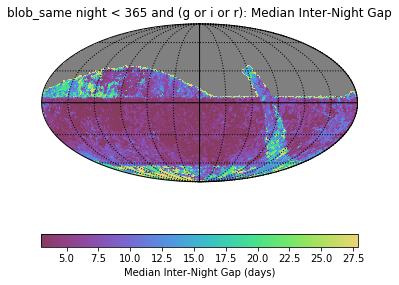

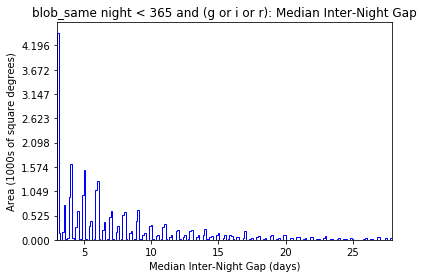

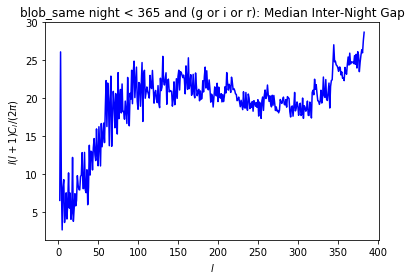

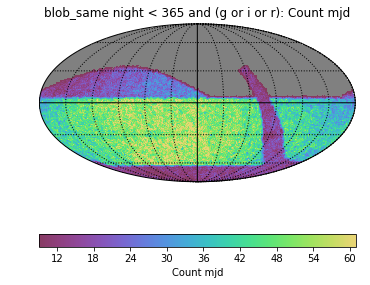

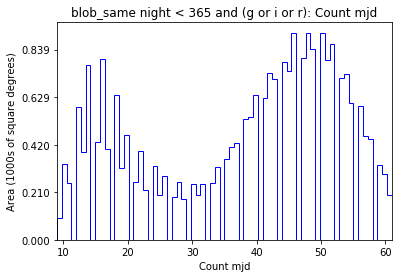

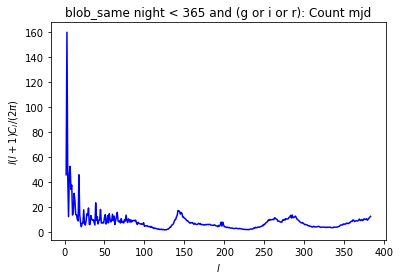

In [8]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

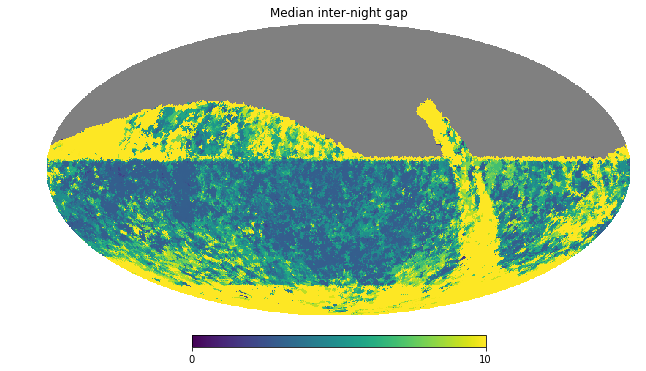

In [9]:
hp.mollview(bundleList[0].metricValues, min=0, max=10, title=title)

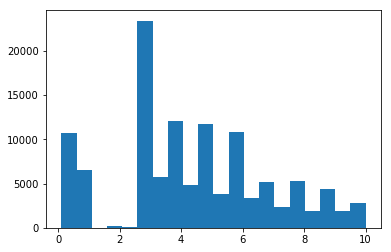

In [10]:
ack = plt.hist(bundleList[0].metricValues, bins=20, range=[0.1,10])

In [11]:
db1 = 'rolling_10yrs.db'
name1 = 'cad_test'
conn = db.Database(db1, defaultTable='observations')
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

Querying database observations with constraint night < 365 and (filter="g" or filter="i" or filter="r") for columns ['dec', 'mjd', 'RA', 'night']
Found 106409 visits
Running:  ['blob_same_Median_Inter-Night_Gap_night_lt_365_and_g_or_i_or_r_HEAL', 'blob_same_Count_mjd_night_lt_365_and_g_or_i_or_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night < 365 and (filter="g" or filter="i" or filter="r")" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 600 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 10.4981  dipole: lon: 113.548, lat: -63.0782, amp: 13.2493


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 1019 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 45.1778  dipole: lon: 16.1274, lat: 73.1118, amp: 24.2292
Plotting complete.


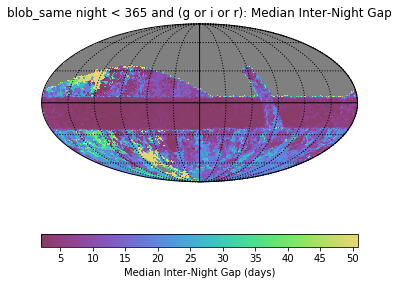

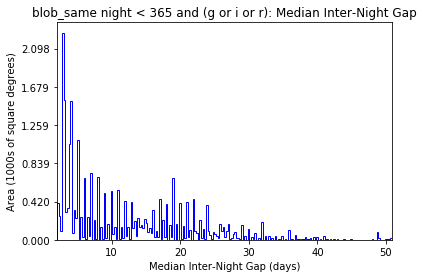

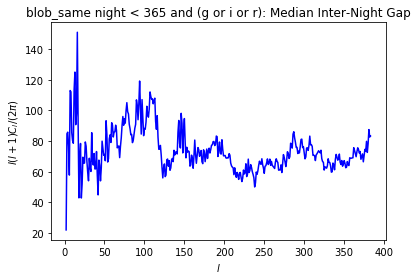

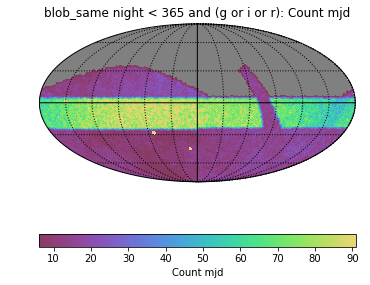

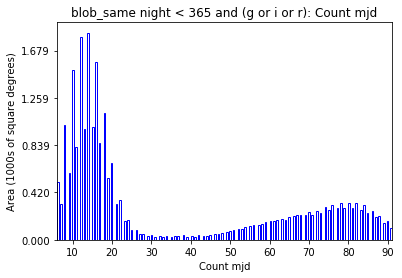

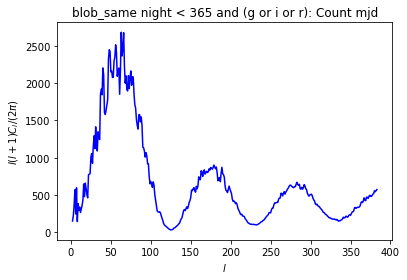

In [12]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

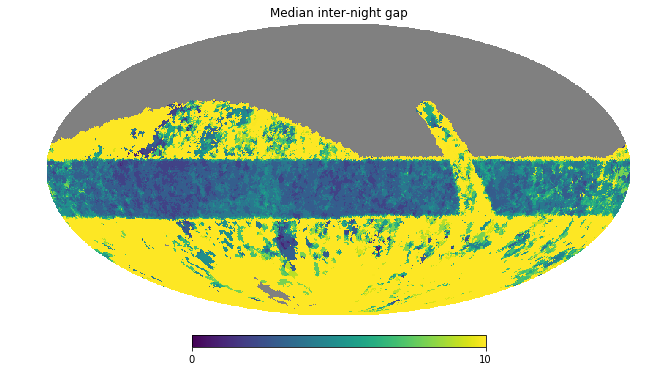

In [13]:
hp.mollview(bundleList[0].metricValues, min=0, max=10, title=title)

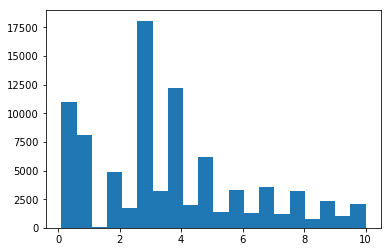

In [14]:
ack = plt.hist(bundleList[0].metricValues, bins=20, range=[0.1,10])

In [15]:
sql

'night < 365 and (filter="g" or filter="i" or filter="r")'